<a href="https://colab.research.google.com/github/Anjali-16/Instagram-Reach-analysis-prediction/blob/main/Instagram_reach_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the required libraries
import pandas as pd  #
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
# mounting the path of google drive to the colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading the file from the drive
df=pd.read_csv("/content/drive/My Drive/instdat.csv", encoding='cp1252')

In [4]:
# getting the first 5 rows of our data frame
df.head(5)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [5]:
# identifying the rows and columns in our data set
df.shape

(119, 13)

In [6]:
# Checking for Null values
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [7]:
# Dropping the null values
df.dropna()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


In [8]:
# Rechecking whether the null values are removed or not
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [9]:
# Again checking the shape to verify whether the null values are removed or not
df.shape

(119, 13)

In [10]:
#  Getting the information from the data regarding the data types columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [11]:
# Getting  the statistical information from the data
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


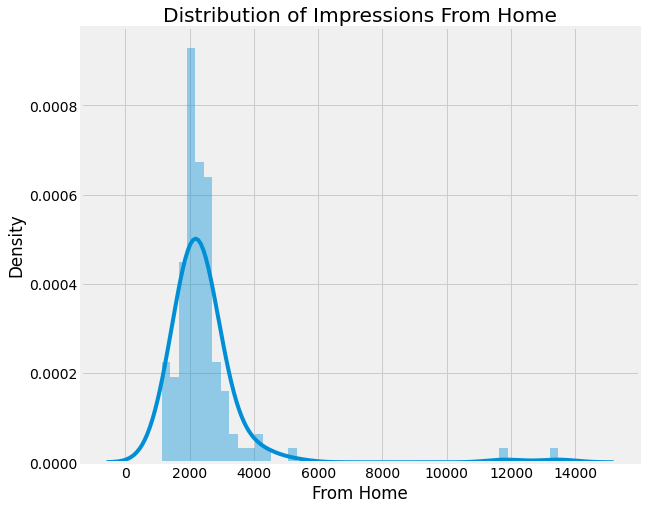

In [ ]:
# First analyse the Impression of Home 
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(df['From Home'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


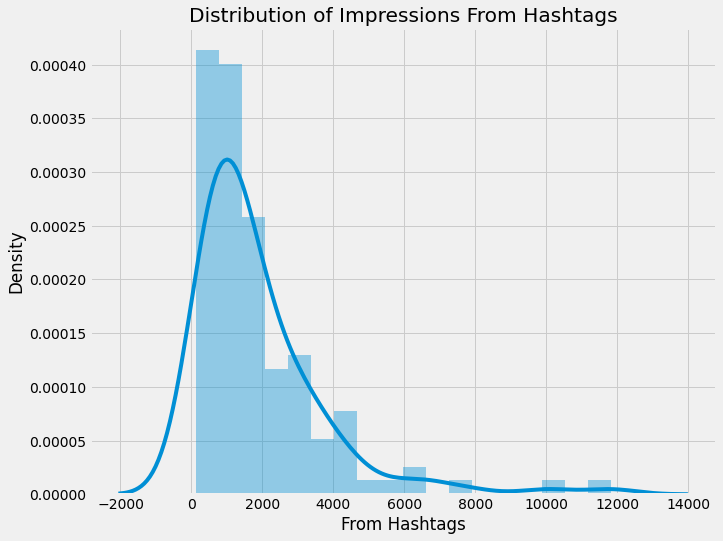

In [ ]:
# Anlysing the Impressions from Hash tags
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(df['From Hashtags'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


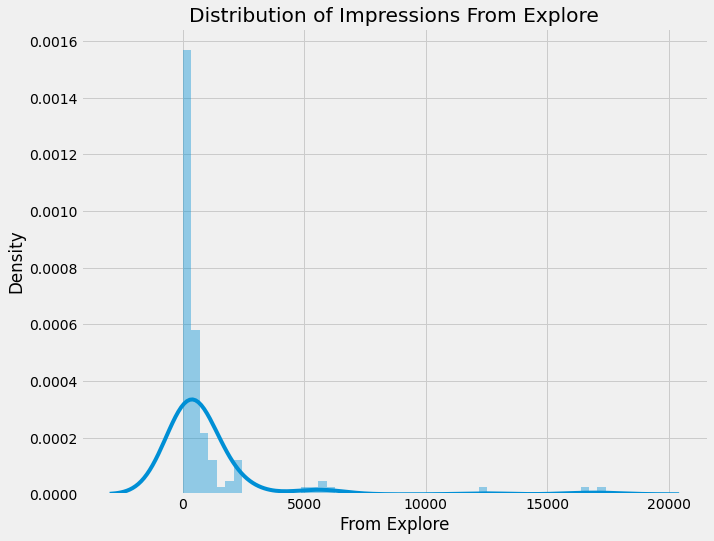

In [ ]:
# Analysing the distribution of impressions from Explore
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(df['From Explore'])
plt.show()

In [ ]:
# Analysing the impressions from various sources.
home = df["From Home"].sum()
hashtags = df["From Hashtags"].sum()
explore = df["From Explore"].sum()
other = df["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(df, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

In [ ]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

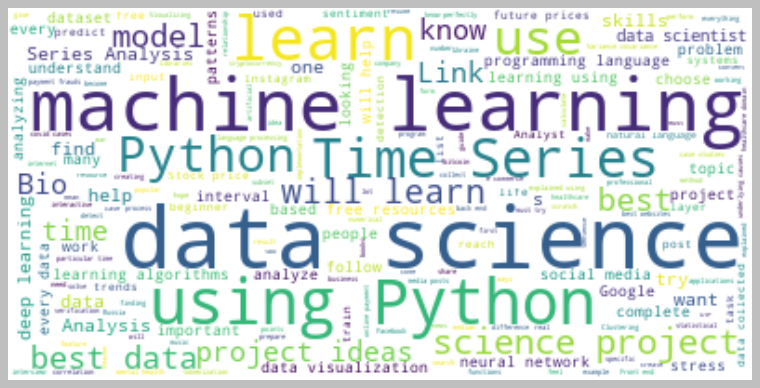

In [ ]:
# With the help of word cloud analysing the word
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in df.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

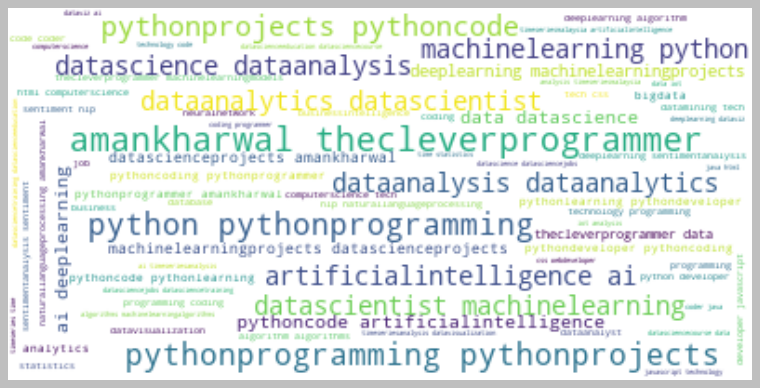

In [ ]:
# Anlysing the word cloud of Hash tags
text = " ".join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Understanding the scatterplot relation between likes and impressions
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

In [ ]:
# Understanding how the comments and Total impressions are related
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

In [ ]:
# Understanding how the shares and total impressions are related
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

In [ ]:
# Understanding how the post and total impressions are related
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

In [ ]:
# Understanding the correlation matrix for observing the independnet variables
correlation = df.corr()
#correlation
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


In [ ]:
# Calculating the conversion rate by using the formula
conversion_rate = (df["Follows"].sum() / df["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


In [ ]:
# Understanding how Profile visits and Followers gained are related
figure = px.scatter(data_frame = df, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

In [ ]:
# Splitting the data set in to train and test
from sklearn.model_selection import train_test_split
x = np.array(df[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(df["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [ ]:
# Fitting and evaluating the score with the help of PassiveAggressiveRegressor Algorithm
# Passive Aggressive Regressor Algorithm
from sklearn.linear_model import PassiveAggressiveRegressor
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.7253855244549503

In [ ]:
# Getting the predictions from our model
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([9384.21379908])

In [ ]:
# Fitting and evaluting the score by using DecisionTreeClassifier
# Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(xtrain, ytrain)
model1.score(xtest, ytest)

0.25

In [ ]:
# Fitting and evaluting the score by using GaussianNB
# Navie bayers algorithm
from sklearn.naive_bayes import GaussianNB
model2=GaussianNB()
model2.fit(xtrain,ytrain)
model2.score(xtest,ytest)

0.25

In [ ]:
# Support Vector Machines
# Fitting and evaluating the score by using SVM
from sklearn import svm
model3=svm.SVC(kernel='linear', C=1,gamma='auto')
model3.fit(xtrain,ytrain)
model3.score(xtest,ytest)

0.25

In [ ]:
# KNN
# Fitting and evaluating the score by using KNN
from sklearn.neighbors import KNeighborsClassifier 
import math
math.sqrt(df.shape[1])


3.605551275463989

In [ ]:
knn= KNeighborsClassifier(4)
knn.fit(xtrain,ytrain)
knn.score(xtest,ytest)

0.041666666666666664

In [ ]:
# Training the data with the help of neural network
# Neural Network
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=20,activation="relu"))
ann.add(tf.keras.layers.Dense(units=10,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
ann.fit(xtrain,ytrain,batch_size=32,epochs = 300)



Epoch 1/300
3/3 [==============================] - 1s 9ms/step - loss: 397891.8438 - accuracy: 0.0000e+00
Epoch 2/300
3/3 [==============================] - 0s 6ms/step - loss: 344933.4688 - accuracy: 0.0000e+00
Epoch 3/300
3/3 [==============================] - 0s 4ms/step - loss: 291788.0312 - accuracy: 0.0000e+00
Epoch 4/300
3/3 [==============================] - 0s 5ms/step - loss: 235933.5000 - accuracy: 0.0000e+00
Epoch 5/300
3/3 [==============================] - 0s 5ms/step - loss: 189347.4062 - accuracy: 0.0000e+00
Epoch 6/300
3/3 [==============================] - 0s 4ms/step - loss: 139003.2969 - accuracy: 0.0000e+00
Epoch 7/300
3/3 [==============================] - 0s 4ms/step - loss: 87501.9453 - accuracy: 0.0000e+00
Epoch 8/300
3/3 [==============================] - 0s 6ms/step - loss: 34896.9375 - accuracy: 0.0000e+00
Epoch 9/300
3/3 [==============================] - 0s 4ms/step - loss: -10908.9434 - accuracy: 0.0000e+00
Epoch 10/300
3/3 [==============================

In [ ]:

# Analysis points from the above
# 1. From the above results we can clearly tell that Passive Aggressive Regressor Algorithm will works well
# 2. It is the one which got high score of 72 percent.